<a href="https://colab.research.google.com/github/aman-makode-11/MLPractice/blob/main/practical6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving Mall_Customers.csv to Mall_Customers (1).csv


{'Mall_Customers (1).csv': b'CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)\r\n1,Male,19,15,39\r\n2,Male,21,15,81\r\n3,Female,20,16,6\r\n4,Female,23,16,77\r\n5,Female,31,17,40\r\n6,Female,22,17,76\r\n7,Female,35,18,6\r\n8,Female,23,18,94\r\n9,Male,64,19,3\r\n10,Female,30,19,72\r\n11,Male,67,19,14\r\n12,Female,35,19,99\r\n13,Female,58,20,15\r\n14,Female,24,20,77\r\n15,Male,37,20,13\r\n16,Male,22,20,79\r\n17,Female,35,21,35\r\n18,Male,20,21,66\r\n19,Male,52,23,29\r\n20,Female,35,23,98\r\n21,Male,35,24,35\r\n22,Male,25,24,73\r\n23,Female,46,25,5\r\n24,Male,31,25,73\r\n25,Female,54,28,14\r\n26,Male,29,28,82\r\n27,Female,45,28,32\r\n28,Male,35,28,61\r\n29,Female,40,29,31\r\n30,Female,23,29,87\r\n31,Male,60,30,4\r\n32,Female,21,30,73\r\n33,Male,53,33,4\r\n34,Male,18,33,92\r\n35,Female,49,33,14\r\n36,Female,21,33,81\r\n37,Female,42,34,17\r\n38,Female,30,34,73\r\n39,Female,36,37,26\r\n40,Female,20,37,75\r\n41,Female,65,38,35\r\n42,Male,24,38,92\r\n43,Male,48,39,36\r\n44,Female

In [ ]:
# Install Libraries
!pip install pandas numpy scikit-learn matplotlib

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Load your dataset into a DataFrame
data = pd.read_csv('Mall_Customers.csv')
print(data.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
# Drop columns not required for the model (like 'CustomerID' or others based on your analysis)
data = data.drop('CustomerID', axis=1)

# Encode categorical data (e.g., 'Gender')
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Select features and target
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]  # Features
y = data['Gender']  # Target (or you can choose another column for clustering tasks)




In [ ]:
#Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=50, min_samples_leaf=25)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=25, min_samples_split=50,
                       random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(160, 0)
(0,)


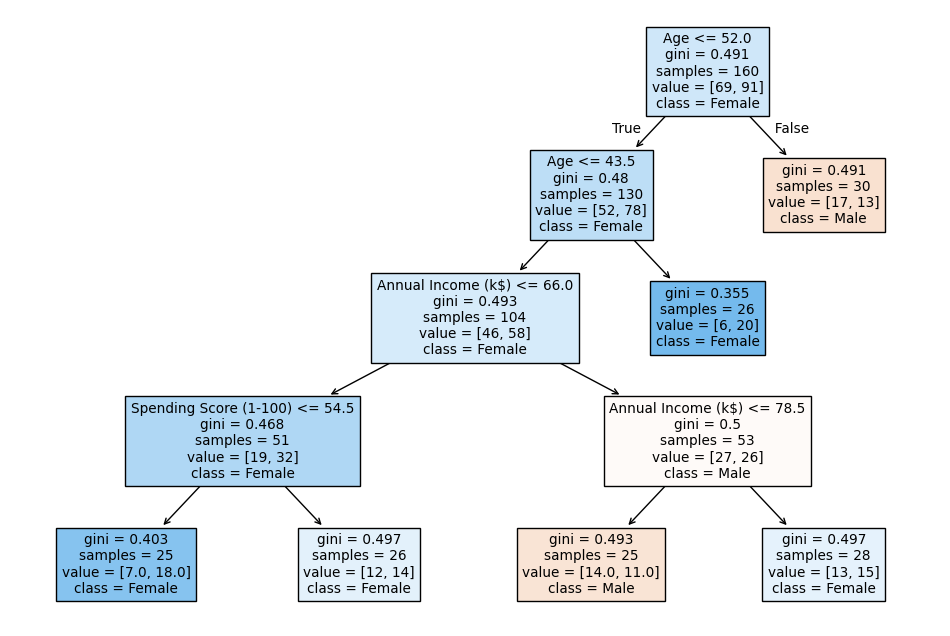

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=['Male', 'Female'], filled=True)
plt.show()


In [ ]:
y_pred = model.predict(X_test)


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.525
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.37      0.42        19
           1       0.54      0.67      0.60        21

    accuracy                           0.53        40
   macro avg       0.52      0.52      0.51        40
weighted avg       0.52      0.53      0.51        40



In [ ]:
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
print(feature_importances.sort_values(by='Importance', ascending=False))


                  Feature  Importance
0                     Age    0.609988
1      Annual Income (k$)    0.230660
2  Spending Score (1-100)    0.159351
